In [1]:
import tensorflow as tf

2023-04-10 08:54:52.255785: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 08:54:52.854245: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Conversion of output to xyxy format

In [2]:
def _xywh2xyxy(xywh):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    x, y, w, h = tf.split(xywh, num_or_size_splits=4, axis=-1)
    return tf.concat([x - w / 2, y - h / 2, x + w / 2, y + h / 2], axis=-1)

In [3]:
def NMS(x):
    
    boxes = _xywh2xyxy(x[..., :4])
    
    
    probs = x[:, :, 4:5]
    classes = x[:, :, 5:]
    scores = probs * classes


    boxes = tf.expand_dims(boxes, 2)
    nms = tf.image.combined_non_max_suppression(boxes,
                                                scores,
                                                max_total_size=100,
                                                max_output_size_per_class=100,
                                                iou_threshold=0.5,
                                                score_threshold=0.1,
                                                clip_boxes=False)
    return nms

In [4]:
x = tf.random.normal(shape=(1, 25200, 85))

out = NMS(x)



# print(out.nmsed_boxes)
# print(out.nmsed_scores)
# print(out.nmsed_classes)
# print(out.valid_detections)


2023-04-10 08:55:00.475975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-10 08:55:00.909631: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-10 08:55:00.910755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-10 08:55:00.916123: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in othe

# defining all inside class

In [5]:
import tensorflow as tf

class postprocess(tf.keras.Model):

  def __init__(self, max_total_size=100, max_output_size_per_class = 100, iou_threshold = 0.5, score_threshold = 0.1):
    super().__init__()
    self.max_total_size = max_total_size
    self.max_output_size_per_class = max_output_size_per_class
    self.iou_threshold = iou_threshold
    self.score_threshold = score_threshold
    
  def NMS(self, x):
    
    boxes = self._xywh2xyxy(x[..., :4])
    
    
    probs = x[:, :, 4:5]
    classes = x[:, :, 5:]
    scores = probs * classes


    boxes = tf.expand_dims(boxes, 2)
    nms = tf.image.combined_non_max_suppression(boxes,
                                                scores,
                                                max_total_size=self.max_total_size ,
                                                max_output_size_per_class=self.max_output_size_per_class,
                                                iou_threshold=self.iou_threshold,
                                                score_threshold=self.score_threshold,
                                                clip_boxes=False)
    return nms
  def _xywh2xyxy(self, xywh):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    x, y, w, h = tf.split(xywh, num_or_size_splits=4, axis=-1)
    return tf.concat([x - w / 2, y - h / 2, x + w / 2, y + h / 2], axis=-1)
  
  def call(self, inputs):
    
    

    out = self.NMS(inputs)
    
    return out

# Defining custom layer

In [6]:

class nms_layer(tf.keras.layers.Layer):
    def __init__(self, max_total_size=100, max_output_size_per_class = 100, iou_threshold = 0.5, score_threshold = 0.1, name='cvt2xyxy_NMS'):
        super().__init__()
        self.max_total_size = max_total_size
        self.max_output_size_per_class = max_output_size_per_class
        self.iou_threshold = iou_threshold
        self.score_threshold = score_threshold

    
    def NMS(self, x):
    
        boxes = self._xywh2xyxy(x[..., :4])
        
        
        probs = x[:, :, 4:5]
        classes = x[:, :, 5:]
        scores = probs * classes


        boxes = tf.expand_dims(boxes, 2)
        nms = tf.image.combined_non_max_suppression(boxes,
                                                    scores,
                                                    max_total_size=self.max_total_size ,
                                                    max_output_size_per_class=self.max_output_size_per_class,
                                                    iou_threshold=self.iou_threshold,
                                                    score_threshold=self.score_threshold,
                                                    clip_boxes=False)
        return nms
    def _xywh2xyxy(self, xywh):
        # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
        x, y, w, h = tf.split(xywh, num_or_size_splits=4, axis=-1)
        return tf.concat([x - w / 2, y - h / 2, x + w / 2, y + h / 2], axis=-1)
      
    def call(self, inputs):
    
    

        out = self.NMS(inputs)
        
        return out

inputs = tf.keras.Input(shape=(25500,85), name="output0", batch_size=1)

# Define the nms layer
after_nms = nms_layer()(inputs)
boxes = after_nms.nmsed_boxes
scores = after_nms.nmsed_scores
classes = after_nms.nmsed_classes
valid_detections = after_nms.valid_detections


# Define the model
model = tf.keras.Model(inputs=inputs, outputs=[boxes, scores, classes, valid_detections])


In [7]:
# tf.saved_model.save(post_process_model, export_dir="nms_model")
tf.keras.models.save_model(model, "/workspace/nms_model")


INFO:tensorflow:Assets written to: /workspace/nms_model/assets


In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output0 (InputLayer)        [(1, 25500, 85)]          0         
                                                                 
 nms_layer (nms_layer)       CombinedNonMaxSuppressio  0         
                             n(nmsed_boxes=(1, 100, 4            
                             ),                                  
                              nmsed_scores=(1, 100),             
                              nmsed_classes=(1, 100),            
                              valid_detections=(1,))             
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [36]:
!pip install -U tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 1.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tf2onnx
    Found existing installation: tf2onnx 1.8.1
    Uninstalling tf2onnx-1.8.1:
      Successfully uninstalled tf2onnx-1.8.1


# Export NMS to ONNX

In [59]:
import tensorflow as tf
import tf2onnx
import onnx
# Load the saved model
model = tf.keras.models.load_model('/workspace/nms_model')
# target_ir_version = onnx.IrVersion(7)

# Convert the model to ONNX format
onnx_model, _ = tf2onnx.convert.from_keras(model,
    opset=17) # this is necessary to get the correct IR version to match the yolo onnx model

# Save the ONNX model to a file
with open('/workspace/nms_post_process.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

2023-04-10 11:27:15.889941: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-10 11:27:15.890020: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2023-04-10 11:27:15.892309: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-10 11:27:15.893415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-10 11:27:15.894264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:984] could not open file to read NUMA node: /sys

In [62]:
!pip install onnxruntime
!pip install onnxsim -q

In [60]:
!onnxsim /workspace/nms_post_process.onnx   /workspace/nms_post_process_simplified.onnx

Your model contains "Tile" ops or/and "ConstantOfShape" ops. Folding these ops 
can make the simplified model much larger. If it is not expected, please specify
"--no-large-tensor" (which will lose some optimization chances)
Simplifying...
Finish! Here is the difference:
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃                   ┃ Original Model ┃ Simplified Model ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Add               │ 3              │ 3                │
│ Cast              │ 2              │ 2                │
│ Concat            │ 6              │ 3                │
│ ConstantOfShape   │ 3              │ 0                │
│ CumSum            │ 1              │ 1                │
│ EyeLike           │ 1              │ 0                │
│ Gather            │ 3              │ 3                │
│ GatherElements    │ 1              │ 1                │
│ GatherND          │ 3              │ 3                │
│ Greater           │ 1         

# Validation with original yolo tf from yolov5 repo.

In [6]:
import tensorflow as tf


batch_size = 1
ch = 3
imgsz = (640, 640)
im = tf.zeros((batch_size, *imgsz, ch))  # BHWC order for TensorFlow

defining the input shape

In [7]:
im.shape

TensorShape([1, 640, 640, 3])

# Example of merging onnx graphs

In [8]:
!pip install sclblonnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.6/671.6 kB 1.4 MB/s eta 0:00:0000:0100:01


In [13]:
import copy

import sclblonnx as so
import numpy as np
from PIL import Image
"""
EXAMPLE 6: Merging two existing graphs.
This example combines two (sub) graphs into a single graph describing a longer pipeline.
The setup builds on example II (example_02.py). We create 2 separate graphs:
1. Graph that resizes an image from 600x450 to 400x300
2. The empty container graph (check_container.onnx) which takes a 400x300 image
Next, we merge the two graphs into one single ONNX file.
"""

# Let's open the large image and inspect the shape:
large_img = np.array(Image.open("/workspace/image.png"), dtype=np.int32)

print(large_img.shape)  # 450x600x3

# First subgraph for resize:
sg1 = so.empty_graph("resize_graph")
sg1 = so.add_input(sg1, "large_image", "INT32", [512, 512, 3])  # Add the input

# The resize node:
e1 = so.constant("roi", np.array([]), "FLOAT")  # Note the empty fields for roi and scales.
e2 = so.constant("scales", np.array([]), "FLOAT")
c1 = so.constant("size", np.array([300, 400, 3]), "INT64")
# add above constants to graph's Resize node
n1 = so.node("Resize", inputs=['large_image', 'roi', 'scales', 'size'], outputs=['small_image'])

sg1 = so.add_nodes(sg1, [e1, e2, c1, n1])
sg1 = so.add_output(sg1, "small_image", "INT32", [300, 400, 3])

# Check and clean
sg1 = so.clean(sg1)
so.check(sg1)

# Test the resize graph:
large_input = {"large_image": large_img.astype(np.int32)}
result = so.run(sg1, inputs=large_input, outputs=['small_image'])

# Round values in array and cast as 8-bit integer to store back as JPG:
img_arr = np.array(np.round(result[0]), dtype=np.uint8)
out = Image.fromarray(img_arr, mode="RGB")
out.save("1-Resized.JPG")  # Yes, this works.

# Store the resize onnx:
so.graph_to_file(sg1, "resize-image-450x600-300x400.onnx")




(512, 512, 3)
ERROR: Unable to optimize your model: Unresolved value references: roi,scales,size,
Running Scailable specific checks for WASM conversion. 
Use _sclbl_check=False to turn off
Your graph was successfully checked.


True

In [65]:

import onnx
from onnx import version_converter

# converted_model = version_converter.convert_version(onnx.load("/workspace/yolov5n6.onnx"), 14)



model = onnx.load("/workspace/nms_post_process_simplified.onnx")
ir_version = model.ir_version
opset_version = model.opset_import[0].version


combined_model = onnx.compose.merge_models(
    onnx.load("/workspace/yolov5n6.onnx"), onnx.load("/workspace/nms_post_process_simplified.onnx"),
    io_map=[("output0", "output0")]
)

In [66]:
onnx.save(combined_model, "/workspace/combined_model.onnx")

# Change output names of fused graph

It will be saved in `/workspace/onnx-modifier/modified_onnx/modified_combined_model.onnx`


In [62]:
combined_model.graph.output

[name: "nms_layer"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 100
      }
      dim {
        dim_value: 4
      }
    }
  }
}
, name: "nms_layer_1"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 100
      }
    }
  }
}
, name: "nms_layer_2"
type {
  tensor_type {
    elem_type: 1
    shape {
      dim {
        dim_value: 1
      }
      dim {
        dim_value: 100
      }
    }
  }
}
, name: "nms_layer_3"
type {
  tensor_type {
    elem_type: 6
    shape {
      dim {
        dim_value: 1
      }
    }
  }
}
]

# After this step, open onnx-modifier and change the output node names

In [68]:
# check onnx model

# modified_dynamic_model = onnx.load("/workspace/combined_model.onnx")
modified_dynamic_model = onnx.load("/workspace/onnx-modifier/modified_onnx/modified_combined_model.onnx")

onnx.checker.check_model(modified_dynamic_model)


# save the model
onnx.save(modified_dynamic_model, "/workspace/static_yolov5n6_nms_talha.onnx")

# Run inference and check

In [143]:
import onnxruntime as ort
import numpy as np
from PIL import Image

# Load the ONNX model
onnx_model = ort.InferenceSession("/workspace/static_yolov5n6_nms_talha.onnx")


# image = Image.open("/workspace/talha_11zon.jpg").convert('RGB').resize((640, 640))
image = Image.open("/workspace/padded_image.jpg").convert('RGB')

# input_shape = (640,640)
# # Define the input data
# input_data = np.random.rand(1, 3, *input_shape).astype(np.float32)

# Run inference on the input data
output_data = onnx_model.run(None, {"images": (np.array(image)/255.0)[None, ...].transpose(0, 3, 1,2).astype(np.float32)  })


In [151]:
print(f"there are {output_data[3].squeeze()} valid detections")


# boxes = output_data[0][0,:output_data[3].squeeze() , :].astype(int)
boxes = output_data[0][0,:output_data[3].squeeze() , :] # for letterbox
scores = output_data[1][0, :output_data[3].squeeze()]

print(scores[0],"\t\t",boxes[0])


there are 5 valid detections
0.8324446 		 [  0.71369934 236.65033    154.88857    385.1709    ]


In [152]:
boxes.shape

(5, 4)

# Utility function

In [147]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def cv2_imshow(image):
    """
    A utility function to display OpenCV images in Jupyter notebooks.
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.show()


def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im




def scale_coords(source_shape, coords, target_shape, ratio_pad=None):
    '''
    scale coordinates from source_shape to target_shape

    Parameters
    ----------
    source_shape : tuple
        shape of the image on which inference was performed
    coords : np.ndarray
        bboxes in xyxy format
    target_shape : tuple
        shape of the original image that was processed using letter-boxing
    ratio_pad : _type_, optional
        _description_, by default None

    Returns
    -------
    np.ndarray
        scaled bbox coordinates
    '''    
    img1_shape = source_shape
    img0_shape = target_shape
    
    if ratio_pad is None:  # calculate from img0_shape
        gain = min(img1_shape[0] / img0_shape[0], img1_shape[1] / img0_shape[1])  # gain  = old / new
        pad = (img1_shape[1] - img0_shape[1] * gain) / 2, (img1_shape[0] - img0_shape[0] * gain) / 2  # wh padding
    else:
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]

    coords[:, [0, 2]] -= pad[0]  # x padding
    coords[:, [1, 3]] -= pad[1]  # y padding
    coords[:, :4] /= gain
    clip_coords(coords, img0_shape)
    return coords

def clip_coords(boxes, shape):
    # Clip bounding xyxy bounding boxes to image shape (height, width)
    boxes[:, 0] = np.clip(boxes[:, 0], 0, shape[1])  # x1
    boxes[:, 1] = np.clip(boxes[:, 1], 0, shape[0])  # y1
    boxes[:, 2] = np.clip(boxes[:, 2], 0, shape[1])  # x2
    boxes[:, 3] = np.clip(boxes[:, 3], 0, shape[0])  # y2
    
    

In [149]:
cars_image = cv2.imread("/workspace/7b75cc14-White_Mercedes_Benz_Cars__Free_Stock_Photo.jpeg")
cars_image = cv2.cvtColor(cars_image, cv2.COLOR_BGR2RGB)
print(f"original image shape ---> {cars_image.shape}")
padded_image = letterbox(cars_image, stride=32, auto=False)

original image shape ---> (2760, 4912, 3)


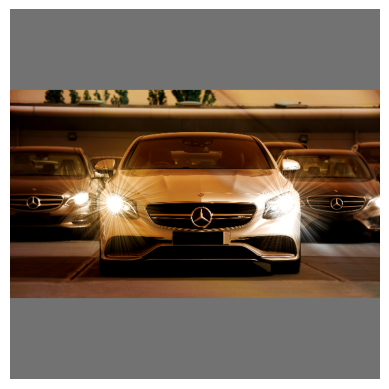

In [141]:
cv2_imshow(padded_image)

In [142]:
padded_image.shape

cv2.imwrite("/workspace/padded_image.jpg", padded_image)

True

scale back the coordinates according to the original image size

In [153]:
boxes[:, :4] = scale_coords((640,640), boxes[:, :4], (2760, 4912)).round()

In [155]:
boxes

array([[   5,  740, 1189, 1880],
       [1046,  534, 3876, 2459],
       [3490,  733, 4903, 2034],
       [4534,  685, 4906, 1157],
       [1085,  899, 1453, 1177]])

boxes.shape

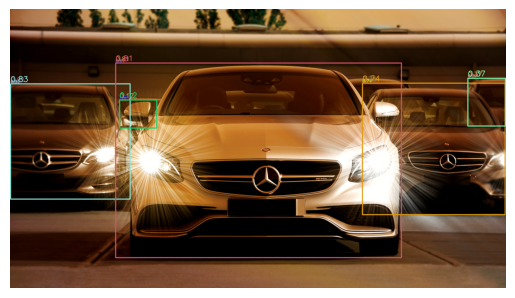

In [161]:
import cv2
import matplotlib.pyplot as plt

# box = boxes[0]

# selected_score = scores[0]


# convert image to numpy array
image = padded_image
boxes = boxes.astype(int)
# rects = []
for box, score in zip(boxes, scores):
    # random color
    color = tuple(np.random.randint(0, 255, size=3).tolist())
    
    image = cv2.rectangle(cars_image, (box[0], box[1]), (box[2], box[3]), color, 10)
    image = cv2.putText(image, f"{score:.2f}", (box[0], box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 2.5, color, 5, cv2.LINE_AA)
    
cv2_imshow(image)

In [32]:

yolo_graph = so.graph_from_file("/workspace/yolov5n6.onnx")

nms_graph = so.graph_from_file("/workspace/nms_post_process.onnx")

print("====================================")

print(so.list_inputs(nms_graph))

print("====================================")

print(so.list_outputs(nms_graph))

print("====================================")

Input 1: Name: 'output0', Type: FLOAT, Dimension: [1,25500,85]
True
Output 1: Name: 'nms_layer_1', Type: FLOAT, Dimension: [1,100,4]
Output 2: Name: 'nms_layer_1_1', Type: FLOAT, Dimension: [1,100]
Output 3: Name: 'nms_layer_1_2', Type: FLOAT, Dimension: [1,100]
Output 4: Name: 'nms_layer_1_3', Type: INT32, Dimension: [1]
True


In [27]:
so.list_outputs(yolo_graph)

Output 1: Name: 'output0', Type: FLOAT, Dimension: [1,25500,85]


True

In [45]:
combined_graph = so.merge(yolo_graph, nms_graph, complete=False, inputs=['output0'], outputs=['output0'])
# combined_graph = so.clean(combined_graph)
so.graph_to_file(combined_graph, "/workspace/combined_graph.onnx")

ERROR: Unable to optimize your model: Unresolved value references: /model.13/Constant_output_0,/model.17/Constant_output_0,/model.21/Constant_output_0,/model.33/Constant_10_output_0,/model.33/Constant_11_output_0,/model.33/Constant_12_output_0,/model.33/Constant_13_output_0,/model.33/Constant_14_output_0,/model.33/Constant_15_output_0,/model.33/Constant_16_output_0,/model.33/Constant_17_output_0,/model.33/Constant_18_output_0,/model.33/Constant_19_output_0,/model.33/Constant_1_output_0,/model.33/Constant_20_output_0,/model.33/Constant_21_output_0,/model.33/Constant_22_output_0,/model.33/Constant_23_output_0,/model.33/Constant_24_output_0,/model.33/Constant_25_output_0,/model.33/Constant_26_output_0,/model.33/Constant_27_output_0,/model.33/Constant_28_output_0,/model.33/Constant_29_output_0,/model.33/Constant_2_output_0,/model.33/Constant_30_output_0,/model.33/Constant_31_output_0,/model.33/Constant_3_output_0,/model.33/Constant_4_output_0,/model.33/Constant_5_output_0,/model.33/Constan

In [44]:
!onnxsim  /workspace/combined_graph.onnx  /workspace/combined_graph_simplified.onnx

Your model contains "Tile" ops or/and "ConstantOfShape" ops. Folding these ops 
can make the simplified model much larger. If it is not expected, please specify
"--no-large-tensor" (which will lose some optimization chances)
Simplifying...
Traceback (most recent call last):
  File "/usr/local/bin/onnxsim", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/onnxsim/onnx_simplifier.py", line 434, in main
    model_opt, check_ok = simplify(
  File "/usr/local/lib/python3.8/dist-packages/onnxsim/onnx_simplifier.py", line 186, in simplify
    model_opt_bytes = C.simplify(
onnx.onnx_cpp2py_export.checker.ValidationError: Node (/model.13/Resize_sg1)'s input 1 is marked single but has an empty string in the graph

==> Context: Bad node spec for node. Name: /model.13/Resize_sg1 OpType: Resize


In [38]:
so.check(combined_graph) 

Running Scailable specific checks for WASM conversion. 
Use _sclbl_check=False to turn off
ERROR: The operator(s) ['GatherND', 'EyeLike', 'GatherND', 'TopK', 'GatherElements', 'GatherND'] are currently not supported.


False

In [ ]:
# So, now we have a working (sub)graph that resizes an image (which obviously we can just load next time)
# Now, we open up the original image processing graph
sg2 = so.graph_from_file("/workspace/nms_post_process_simplified.onnx")

# The outputs of sg1 and the inputs of sg2 need to match; lets examine them
so.list_outputs(sg1)
so.list_inputs(sg2)

# Merge the two graphs, the outputs will be merged with the inputs in order of appearance:
g = so.merge(sg1, sg2, outputs=["small_image"], inputs=["in"])
so.check(g)
so.display(g)

# And now it works with the large image:
result = so.run(g, inputs=large_input, outputs=['result'])
# Print the result
if result[0]:
    print("The container in the large image is empty.")
else:
    print("The container in the large image is filled.")

# Store the merged graph
g = so.graph_to_file(g, "onnx/check-container-resize.onnx")


In [42]:
import onnx_graphsurgeon as gs
import onnx
import numpy as np


@gs.Graph.register()
def trt_batched_nms(self, boxes_input, scores_input, nms_output,
                    share_location, num_classes):

    boxes_input.outputs.clear()
    scores_input.outputs.clear()
    nms_output.inputs.clear()

    attrs = {
        "shareLocation": share_location,
        "numClasses": num_classes,
        "backgroundLabelId": 0,
        "topK": 116740,
        "keepTopK": 100,
        "scoreThreshold": 0.3,
        "iouThreshold": 0.6,
        "isNormalized": True,
        "clipBoxes": True
    }
    return self.layer(op="BatchedNMS_TRT", attrs=attrs,
                      inputs=[boxes_input, scores_input],
                      outputs=[nms_output])
    

In [ ]:
graph = gs.import_onnx(onnx.load(input_model_path))